**RECOGNIZING HAND WRITTEN DIGITS**



The handwritten digit recognition is capability of computer applications to recognize the handwritten digits.As,they are not perfect with many different shapes and sizes,the efficiency of the machine often drops.This system is a way to tackle this problem which uses the image of a digit and recognizes the digit.Number recognition has numerous operations like number plate recognition, postal correspondence sorting, bank check processing.

The Digits data set of the Scikit-learn library is imported useful for data analysis and prediction of the results.

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.datasets import load_digits
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
digits = load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

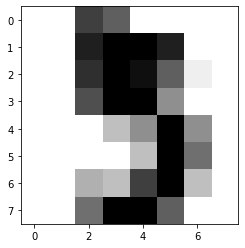

In [6]:
%matplotlib inline
plt.imshow(digits.images[5], cmap=plt.cm.gray_r,interpolation='nearest')
#The digits dataset consists of 8x8 pixel images of digits.

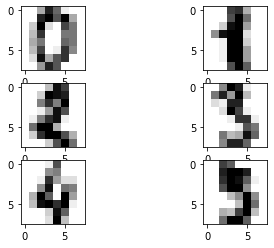

In [73]:
plt.subplot(321)
plt.imshow(digits.images[0],cmap=plt.cm.gray_r,interpolation='nearest')
plt.subplot(322)
plt.imshow(digits.images[1],cmap=plt.cm.gray_r,interpolation='nearest')
plt.subplot(323)
plt.imshow(digits.images[2],cmap=plt.cm.gray_r,interpolation='nearest')
plt.subplot(324)
plt.imshow(digits.images[3],cmap=plt.cm.gray_r,interpolation='nearest')
plt.subplot(325)
plt.imshow(digits.images[4],cmap=plt.cm.gray_r,interpolation='nearest')
plt.subplot(326)
plt.imshow(digits.images[5],cmap=plt.cm.gray_r,interpolation='nearest')


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.3)

**Logistic Regression**

In [8]:
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9537037037037037

**SVM**

In [9]:
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.31851851851851853

**Random Forest**

In [10]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9648148148148148

In [11]:
predictions= rf.predict(X_test)
score = rf.score(X_test, y_test)

Text(0.5, 1.0, 'accuracy score:0.9648148148148148')

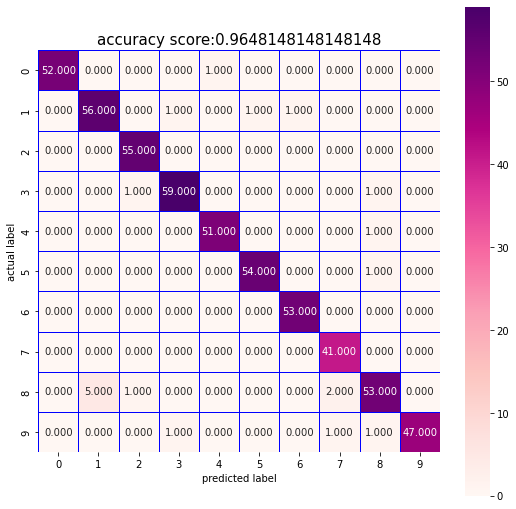

In [14]:
cm= metrics.confusion_matrix(y_test,predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,fmt='.3f',linewidths=.5,square= True,cmap = 'RdPu',linecolor='blue');
plt.ylabel('actual label');
plt.xlabel('predicted label');
all_sample_title = 'accuracy score:{0}'.format(score)
plt.title(all_sample_title,size=15)

**KFold cross validation**

In [7]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [22]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index, test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


**Use KFold for our digits example**

In [23]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [14]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3)

scores_logistic = []
scores_svm = []
scores_rf = []

for train_index, test_index in folds.split(digits.data,digits.target):
    X_train, X_test, y_train, y_test = digits.data[train_index], digits.data[test_index], \
                                       digits.target[train_index], digits.target[test_index]
    scores_logistic.append(get_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X_train, X_test, y_train, y_test))  
    scores_svm.append(get_score(SVC(gamma='auto'), X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=40), X_train, X_test, y_train, y_test))

In [29]:
scores_logistic

[0.8948247078464107, 0.9532554257095158, 0.9098497495826378]

In [30]:
scores_svm

[0.3806343906510851, 0.41068447412353926, 0.5125208681135225]

In [31]:
scores_rf

[0.9348914858096828, 0.9582637729549248, 0.9232053422370617]

In [19]:
from sklearn.model_selection import cross_val_score

**cross_val_score function**

**Logistic Regression model performance using cross_val_score**

In [20]:
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), digits.data, digits.target,cv=3)

array([0.89482471, 0.95325543, 0.90984975])

**SVM model performance using cross_val_score**

In [21]:
cross_val_score(SVC(gamma='auto'), digits.data, digits.target,cv=3)

array([0.38063439, 0.41068447, 0.51252087])

**Random Forest performance using cross_val_score**

In [22]:
cross_val_score(RandomForestClassifier(n_estimators=40),digits.data, digits.target,cv=3)

array([0.93989983, 0.94156928, 0.92654424])

cross_val_score uses stratifield kfold by default

**Parameter Tunning using k-fold cross validation**

In [23]:
scores1 = cross_val_score(RandomForestClassifier(n_estimators=5),digits.data, digits.target, cv=10)
np.average(scores1)

0.8814804469273743

In [24]:
scores2 = cross_val_score(RandomForestClassifier(n_estimators=20),digits.data, digits.target, cv=10)
np.average(scores2)

0.9354531346989446

In [25]:
scores3 = cross_val_score(RandomForestClassifier(n_estimators=30),digits.data, digits.target, cv=10)
np.average(scores3)

0.9454686530105523

In [26]:
scores4 = cross_val_score(RandomForestClassifier(n_estimators=40),digits.data, digits.target, cv=10)
np.average(scores4)

0.9476598386095592

**From the above accuracy score, the randam forest classifier model provides us the maximum accuracy and also data tunning is performed to increase the efficiency of the model.We have used cross_val_score to fine tune our random forest classifier and figured that having around 40 trees in random forest gives best result**